In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import rebound
import orbital as orb

In [2]:
years = 2.0*np.pi
file = "simulations/sa.20191029T084021.bin"
sa = rebound.SimulationArchive(file)
print(len(sa))
e1 = np.zeros(len(sa))
a1 = np.zeros(len(sa))
inc1 = np.zeros(len(sa))
inc2 = np.zeros(len(sa))
Omega1 = np.zeros(len(sa))
Omega2 = np.zeros(len(sa))
pomega1 = np.zeros(len(sa))
pomega2 = np.zeros(len(sa))


t = np.zeros(len(sa))
for i, sim in enumerate(sa):
    ps = sim.particles
    e1[i] = ps[1].e
    a1[i] = ps[1].a
    inc1[i] = ps[1].inc
    inc2[i] = ps[2].inc
    Omega1[i] = ps[1].Omega
    Omega2[i] = ps[2].Omega
    pomega1[i] = ps[1].pomega
    pomega2[i] = ps[2].pomega
    t[i] = sim.t
    
t = t/(2.*np.pi)
tmyr = t/1e6

1001


/storage/home/len56/.local/lib/python3.6/site-packages/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/storage/home/len56/.local/lib/python3.6/site-packages/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/storage/home/len56/.local/lib/python3.6/site-packages/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


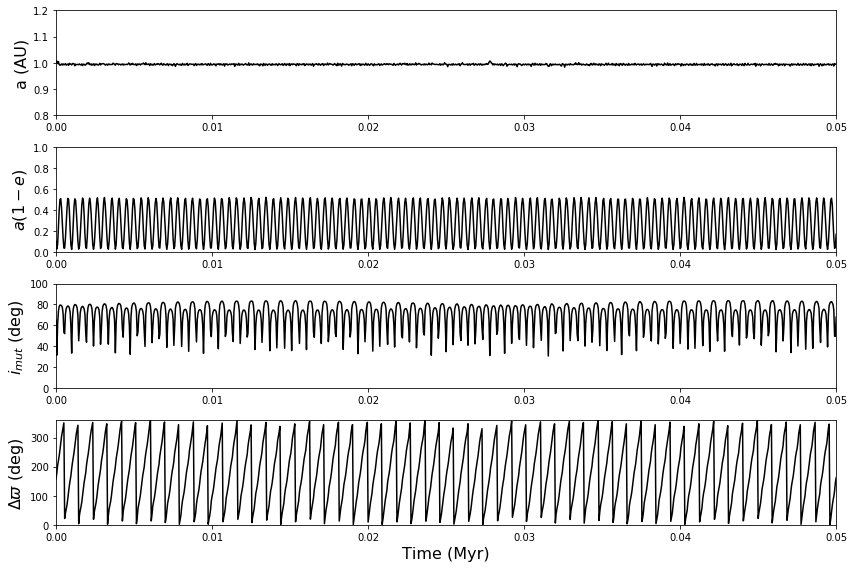

In [32]:
imut = np.degrees(orb.calc_imut(inc1, inc2, Omega1, Omega2))
pomega = np.degrees(orb.calc_deltapomega(pomega1, pomega2))
color='black'
fontsize=16
fig, axarr = plt.subplots(nrows=4,figsize=(12,8))


axarr[0].plot(tmyr, a1,color=color)
axarr[0].set_ylabel("a (AU)", fontsize=fontsize)
axarr[0].legend(fontsize=24)
axarr[0].margins(x=0)
axarr[0].set_ylim(0.8,1.2)
axarr[1].plot(tmyr, a1*(1.-e1),color=color)
axarr[1].set_ylabel(r'$a(1-e)$', fontsize=fontsize)
#axarr[1].set_yscale('log')
axarr[1].set_ylim(0.,1.)
axarr[1].margins(x=0)
axarr[2].plot(tmyr, imut,color=color)
axarr[2].set_ylabel(r'$i_{mut}$ (deg)', fontsize=fontsize)
axarr[2].legend(fontsize=24)
axarr[2].margins(x=0)
axarr[2].set_ylim(0,100)
axarr[3].plot(tmyr, pomega,color=color)
axarr[3].set_ylabel(r'$\Delta\varpi$ (deg)', fontsize=fontsize)
axarr[3].legend(fontsize=24)
axarr[3].margins(x=0)
axarr[3].set_ylim(0,360)
axarr[3].set_xlabel('Time (Myr)', fontsize=fontsize)
plt.tight_layout()
plt.savefig('plots/p20191029T084021.pdf',bbox_inches='tight')



In [14]:
orbit = sim.particles[1].calculate_orbit(sim.particles[0])

In [36]:
sa[-1].integrator

/storage/home/len56/.local/lib/python3.6/site-packages/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/storage/home/len56/.local/lib/python3.6/site-packages/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


'ias15'